<a href="https://colab.research.google.com/github/jennlee0102/preview/blob/main/AI_17_%EC%9D%B4%EC%9E%AC%EC%9D%80_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

# 1. Setting 다음 분기에 어떤 게임을 설계해야 할까

<필수>
1. 영상 길이 조건을 만족했는가?
 - 영상이 5분 ~ 10분 사이로 제작됨

2. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가? -> 어떤 지역에 홍보를 집중할 지 결정
 - 지역은 어떻게 구분했는지 설명함
 - 지역별로 선호하는 게임의 장르를 파악함
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

3. 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?->현재트렌드에 맞는 장르 선택
 - 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 - 연도별로 트렌드가 존재하는지 여부를 언급함
 - 왜 존재한다/존재하지 않는다고 생각했는지 설명함

4. 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
 - 인기가 많다는 것을 어떻게 정의했는지 설명함
 - 해당 게임이 왜 인기가 많다고 생각했는지 설명함
 - 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)
 - 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함 -> 위 조건들에 부합하는 회사와 게임 검색

5. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 - 분석에 대한 결론이 영상에서 제시됨<br>
<br>

[유의미한 인사이트를 도출하기 위해서]<br>
 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.<br>
  다음 분기가 언제인지: 내년 봄?<br>
  회사의 규모는 어느정도인지: 넷마블?<br>
<br>
[추가조건]<br>
 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?<br>
 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?<br>
 제공된 데이터셋 외에 추가 데이터를 사용하였는가?<br>
 통계적 기법을 활용한 가설 검정을 진행하였는가?완성도 높은 시각화를 보여주었는가?<br>
 가독성, 목적성이 잘 드러나는 시각화

# 2. Preprocessing

In [ ]:
data = pd.read_csv('vgames2.csv', index_col=0)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
data.shape

(16598, 9)

In [ ]:
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# # drop rows with two or more nulls
# drop = data[(data['Year'].isnull() & data['Genre'].isnull()) |
#      (data['Year'].isnull() & data['Publisher'].isnull()) |
#      (data['Genre'].isnull() & data['Publisher'].isnull())].index
# df = data.drop(drop)

In [ ]:
# # regard unknown publisher as null value and drop the rows if there are two or more null values
# unknown = df[df['Publisher'] == 'Unknown']
# drop2 = unknown[data['Year'].isnull() | data['Genre'].isnull()].index
# df = df.drop(drop2)

In [ ]:
# display all rows
pd.set_option('display.max_row', None)

In [ ]:
# back to orig.
pd.options.display.max_rows = 60

In [ ]:
# display all the columns with NaN
data[data.isna().any(axis=1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [ ]:
data[data['Publisher'] == 'Unknown']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0,0,0
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
213,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0,0
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
388,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
...,...,...,...,...,...,...,...,...,...
16401,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0,0.08,0.01
16403,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [ ]:
# it would not be efficient to replace the null values since the # of nulls are insignificant among (16598, 9) data.
# -> Decide to drop them

data.dropna(subset = ['Year', 'Genre'], inplace = True) 

In [ ]:
# the nulls in ['publisher'] won't affect analysis despite of the missing values.
# -> change to 'Unknown' at this moment and see if it has a significant meaning.

data['Publisher'].fillna('Unknown',inplace=True)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
data['Year'].astype(int)

1        2008
2        2009
3        2010
4        2010
5        2010
         ... 
16594    2006
16595    2005
16596    2015
16597    2013
16598    1996
Name: Year, Length: 16277, dtype: int64

In [ ]:
data['Year'].describe()

count    16277.000000
mean      1994.206365
std        155.313461
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [ ]:
data.sort_values(by=['Year'], axis=0)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9277,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
14667,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
8682,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
2250,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
...,...,...,...,...,...,...,...,...,...
13778,NHL 17,XOne,2016.0,Sports,Electronic Arts,0.13,0.01,0,0.02
10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
5311,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [ ]:
# replace less than 3 digits in ['Year'] column to 4 digits
# as the result of ascending sort by Year col, it came out with 0~16, 86~98.
# 0<=x<=20 -> add 2000
# 20<x<1000 -> add 19 to the front
def year(x):
  if (0 <= x < 20):
    return int(2000 + x)
  elif (86 <= x <100):
    return int(1900 + x)
  else:
    return int(x)

data['Year'] = data['Year'].apply(year)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
data.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  object
 6   EU_Sales     16277 non-null  object
 7   JP_Sales     16277 non-null  object
 8   Other_Sales  16277 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# return Platform unique vals
num_P = data['Platform'].unique()
print(len(num_P))
num_P

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# return Genre unique vals
num_G = data['Genre'].unique()
print(len(num_G))
num_G

12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
# return Genre unique vals
num_P = data['Publisher'].unique()
print(len(num_P))
num_P;

575


In [ ]:
# https://www.vgchartz.com/charts/platform_totals/Hardware.php

In [ ]:
# Need to append/join extra column to regroup by platform
# (handheld, home, PC)

# home video game console:'Wii', 'WiiU', 'N64', '3DO', 'NES', 'SNES', 'PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne',
#                         'DC', '2600', 'GC', 'SAT', 'GEN', 'SCD', 'NG', 'TG16', 'PCFX'
# handheld video game console: 'GB', 'GBA', 'PSP', 'PSV', 'DS', '3DS', 'WS', 'GG'
# PC: 'PC'

In [ ]:
data[data['Platform'] == 'PC']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
13,Mount & Blade,PC,2008,Role-Playing,Paradox Interactive,0,0.02,0,0
17,Rise of Nations,PC,2003,Strategy,Microsoft Game Studios,0.01,0.02,0,0.01
20,Tropico Reloaded,PC,2009,Strategy,Kalypso Media,0,0.02,0,0
28,World of Tanks,PC,2011,Shooter,Wargaming.net,0,0.23,0,0.06
...,...,...,...,...,...,...,...,...,...
16502,"Warhammer 40,000: Dawn of War",PC,2004,Strategy,THQ,0.01,0.03,0,0.01
16523,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01,0,0,0
16528,Gothic 3,PC,2006,Role-Playing,JoWood Productions,0,0.05,0,0.01
16543,Richard Burns Rally,PC,2004,Racing,SCi,0,0.03,0,0.01


In [ ]:
# see if multi-platform game exists

df_dup = data[data.duplicated(['Name'])]
dupcount = df_dup['Name'].unique()
print(len(dupcount))
dupcount

2712


array(['Call of Duty 4: Modern Warfare', 'IL-2 Sturmovik: Birds of Prey',
       'NASCAR Unleashed', ..., "Super Ghouls 'n Ghosts", 'MindJack',
       'Toukiden: The Age of Demons'], dtype=object)

In [ ]:
# create 'Multiplatform' column next to 'Platform'

data.insert(2, 'Multiplatform', data.duplicated(['Name'],keep=False))

In [ ]:
# classification by publisher

# Nintendo: 'DS', '3DS', 'Wii', 'WiiU', 'GB', 'GBA', 'NES', 'SNES', 'N64', 
# Microsoft: 'XB','X360','XOne'
# Panasonic: '3DO',
# Sony PSP: 'PSP', 'PS3', 'PS', 'PS4', 'PS2','PSV'
# GameCube: 'GC'
# Atari: '2600',
# Sega: 'SAT','GG', 'GEN', 'SCD', 
# Sonic: 'DC',
# Bandai: 'WS', 
# SNK: 'NG'
# NEC and Hudson Soft: 'PCFX', 'TG16',
# 'PC'
# Sega 'GG' is already discontinued in 1997 due to short battery life, lack of original games, and weak support from Sega

# maybe can use pivot...?
# --> it doesn't seem that classification by company really matters

In [ ]:
# Platform can be categorized into Handheld, Home, PC -> make a new col and put it next to the Platform col.
# Hand = np.where({data.Platform == 'GB'} | {data.Platform == 'GBA'} | {data.Platform == 'PSP'} | {data.Platform == 'PSV'} | {data.Platform == 'DS'} | {data.Platform == '3DS'} | {data.Platform == 'WS'} | {data.Platform == 'GG'}) # Handheld: 'GB', 'GBA', 'PSP', 'PSV', 'DS', '3DS', 'WS', 'GG'

data.insert(3, "Platform_Group", (np.where(data.Platform == 'PC', 'PC', np.where((data.Platform == 'GB') | (data.Platform == 'GBA') | (data.Platform == 'PSP') | (data.Platform == 'PSV') | (data.Platform == 'DS') | (data.Platform == '3DS') | (data.Platform == 'WS') | (data.Platform == 'GG'), 'Handheld', 'Home'))))

In [ ]:
data

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,True,Home,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,False,Handheld,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,True,Home,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,True,Handheld,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
data['Platform_Group'].unique()

array(['Handheld', 'Home', 'PC'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            16277 non-null  object
 1   Platform        16277 non-null  object
 2   Multiplatform   16277 non-null  bool  
 3   Platform_Group  16277 non-null  object
 4   Year            16277 non-null  int64 
 5   Genre           16277 non-null  object
 6   Publisher       16277 non-null  object
 7   NA_Sales        16277 non-null  object
 8   EU_Sales        16277 non-null  object
 9   JP_Sales        16277 non-null  object
 10  Other_Sales     16277 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.4+ MB


In [ ]:
# the sales Dtype is object due to string
data.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [ ]:
# sales (in millions of units) per platform -> match unit to millions (K = 0.001, remove M)

def sales(vals) :
  if vals[-1:] == 'K' :
    vals = vals.replace('K', '')
    return float(vals) * 0.001
  elif vals[-1:] == 'M' :
    return float(vals.replace('M',''))
  else :
    return float(vals)

data['NA_Sales(M)'] = data['NA_Sales'].apply(sales)
data['EU_Sales(M)'] = data['EU_Sales'].apply(sales)
data['JP_Sales(M)'] = data['JP_Sales'].apply(sales)
data['Other_Sales(M)'] = data['Other_Sales'].apply(sales)

df = data.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df = df.reset_index().drop(columns = 'index')

In [ ]:
df

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,True,Home,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16273,Rainbow Islands: Revolution,PSP,False,Handheld,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16274,NBA 2K16,PS3,True,Home,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,True,Handheld,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16277 non-null  object 
 1   Platform        16277 non-null  object 
 2   Multiplatform   16277 non-null  bool   
 3   Platform_Group  16277 non-null  object 
 4   Year            16277 non-null  int64  
 5   Genre           16277 non-null  object 
 6   Publisher       16277 non-null  object 
 7   NA_Sales(M)     16277 non-null  float64
 8   EU_Sales(M)     16277 non-null  float64
 9   JP_Sales(M)     16277 non-null  float64
 10  Other_Sales(M)  16277 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
# create a column of Total_Sales

df['Total_Sales(M)'] = df['NA_Sales(M)'] + df['EU_Sales(M)'] + df['JP_Sales(M)'] + df['Other_Sales(M)']
df

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,True,Home,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16273,Rainbow Islands: Revolution,PSP,False,Handheld,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16274,NBA 2K16,PS3,True,Home,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16275,Toukiden: The Age of Demons,PSV,True,Handheld,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.sort_values(['Year','Total_Sales(M)']).reset_index()

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,7182,Checkers,2600,False,Home,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.23
1,9063,Bridge,2600,False,Home,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,12885,Freeway,2600,False,Home,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
3,13988,Boxing,2600,True,Home,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
4,9942,Defender,2600,True,Home,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16272,15179,FIFA 17,PS4,True,Home,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
16273,5206,Brothers Conflict: Precious Baby,PSV,False,Handheld,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16274,14937,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,True,Handheld,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16275,9929,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,True,Home,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [ ]:
df.corr()

,Multiplatform,Year,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
Multiplatform,1.000000,0.230546,0.057173,0.060089,-0.116546,0.082096,0.036507
Year,0.230546,1.000000,-0.091934,0.005236,-0.172235,0.040688,-0.075770
NA_Sales(M),0.057173,-0.091934,1.000000,0.768919,0.449360,0.634697,0.941654
EU_Sales(M),0.060089,0.005236,0.768919,1.000000,0.432385,0.728093,0.903212
JP_Sales(M),-0.116546,-0.172235,0.449360,0.432385,1.000000,0.285489,0.609233
Other_Sales(M),0.082096,0.040688,0.634697,0.728093,0.285489,1.000000,0.748176
Total_Sales(M),0.036507,-0.075770,0.941654,0.903212,0.609233,0.748176,1.000000


<ipython-input-39-7e55c4c589c8>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(coff_df, dtype=np.bool)


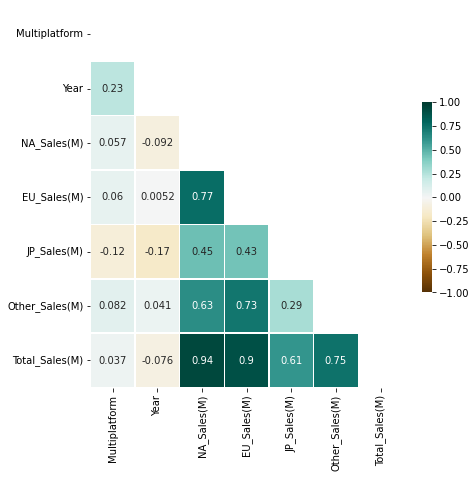

In [ ]:
coff_df = df.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(coff_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(coff_df, 
            cmap = 'BrBG', 
            annot = True,             # 실제 값을 표시한다
            mask=mask,                # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,            # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1        # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
# average sales in every region

a=(df['NA_Sales(M)'].mean()*1000000)
b=(df['EU_Sales(M)'].mean()*1000000)
c=(df['JP_Sales(M)'].mean()*1000000)
d=(df['Other_Sales(M)'].mean()*1000000)
e=(df['Total_Sales(M)'].mean()*1000000)

print("The average sales in North America =", (f"${a:,.2f}")) #comma separated values till 3 decimal place and $ sign
print("The average sales in Europe =",(f"${b:,.2f}"))
print("The average sales in Japan =",(f"${c:,.2f}"))
print("The average sales in other regions =",(f"${d:,.2f}"))
print("The average sales globally =",(f"${e:,.2f}"))

The average sales in North America = $264,964.06
The average sales in Europe = $147,201.57
The average sales in Japan = $78,111.45
The average sales in other regions = $48,133.56
The average sales globally = $538,410.64


# Q1. 지역에 따라 선호하는 게임의 장르가 다를까?

- 지역은 어떻게 구분했는지<br>
- 지역별로 선호하는 게임의 장르<br>
- 지역별로 선호하는 게임의 장르가 같은/다른 이유

In [ ]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
# game sales revenue in order: China, US, Japan, South Korea and then mostly European countries are followed.
# NA, Europe, Japan, 
# Chinese seems to prefer made-in-China game. due to government's strictest limits on gaming, it'd better not to consider China.
# In this analysis, I will assess the preferred genre by region based on the given data.

# creating a dataframe named 'by_region'
by_region = pd.DataFrame({'Genre': df['Genre'].values,
                          'NA': df['NA_Sales(M)'].values,
                          'EU': df['EU_Sales(M)'].values,
                          'JP': df['JP_Sales(M)'].values,
                          'Other': df['Other_Sales(M)'].values,
                          'Total': df['Total_Sales(M)'].values})

by_region = by_region.groupby('Genre').sum().reset_index()
by_region

,Genre,NA,EU,JP,Other,Total
0,Action,858.78,513.64,156.61,183.99,1713.02
1,Adventure,101.92,63.71,51.89,16.70,234.22
2,Fighting,220.35,99.90,87.14,36.15,443.54
3,Misc,400.29,210.20,104.18,72.74,787.41
4,Platform,445.38,200.65,130.53,51.45,828.01
5,Puzzle,121.58,50.48,56.24,12.44,240.74
6,Racing,354.70,235.03,56.32,76.51,722.56
7,Role-Playing,318.76,183.10,342.93,56.73,901.52
8,Shooter,574.48,310.23,38.18,101.86,1024.75
9,Simulation,181.43,113.17,63.54,31.32,389.46


In [ ]:
#Grouping the north america sales(M) based on each Genre
data1 = pd.DataFrame(df.groupby("Genre")[["NA_Sales(M)"]].sum().sort_values(by=['NA_Sales(M)'],ascending=[False]).reset_index())
data1.rename(columns = {'Genre':'Genre_NA'}, inplace = True)

#Grouping the europe sales(M) based on each Genre
data2 = pd.DataFrame(df.groupby("Genre")[["EU_Sales(M)"]].sum().sort_values(by=['EU_Sales(M)'],ascending=[False]).reset_index())
data2.rename(columns = {'Genre':'Genre_EU'}, inplace = True)

#Grouping the japan sales(M) based on each Genre
data3 = pd.DataFrame(df.groupby("Genre")[["JP_Sales(M)"]].sum().sort_values(by=['JP_Sales(M)'],ascending=[False]).reset_index())
data3.rename(columns = {'Genre':'Genre_JP'}, inplace = True)

#Grouping the other region sales(M) based on each Genre
data4 = pd.DataFrame(df.groupby("Genre")[["Other_Sales(M)"]].sum().sort_values(by=['Other_Sales(M)'],ascending=[False]).reset_index())
data4.rename(columns = {'Genre':'Genre_Other'}, inplace = True)

#Grouping the global sales(M) based on each Genre
data5 = pd.DataFrame(df.groupby("Genre")[["Total_Sales(M)"]].sum().sort_values(by=['Total_Sales(M)'],ascending=[False]).reset_index())
data5.rename(columns = {'Genre':'Genre_Total'}, inplace = True)

#Concatenating our datasets
sales_data=pd.concat([data1,data2,data3,data4,data5],axis=1)
sales_data

,Genre_NA,NA_Sales(M),Genre_EU,EU_Sales(M),Genre_JP,JP_Sales(M),Genre_Other,Other_Sales(M),Genre_Total,Total_Sales(M)
0,Action,858.78,Action,513.64,Role-Playing,342.93,Action,183.99,Action,1713.02
1,Sports,667.26,Sports,370.97,Action,156.61,Sports,132.35,Sports,1305.34
2,Shooter,574.48,Shooter,310.23,Sports,134.76,Shooter,101.86,Shooter,1024.75
3,Platform,445.38,Racing,235.03,Platform,130.53,Racing,76.51,Role-Playing,901.52
4,Misc,400.29,Misc,210.20,Misc,104.18,Misc,72.74,Platform,828.01
5,Racing,354.70,Platform,200.65,Fighting,87.14,Role-Playing,56.73,Misc,787.41
6,Role-Playing,318.76,Role-Playing,183.10,Simulation,63.54,Platform,51.45,Racing,722.56
7,Fighting,220.35,Simulation,113.17,Racing,56.32,Fighting,36.15,Fighting,443.54
8,Simulation,181.43,Fighting,99.90,Puzzle,56.24,Simulation,31.32,Simulation,389.46
9,Puzzle,121.58,Adventure,63.71,Adventure,51.89,Adventure,16.70,Puzzle,240.74


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

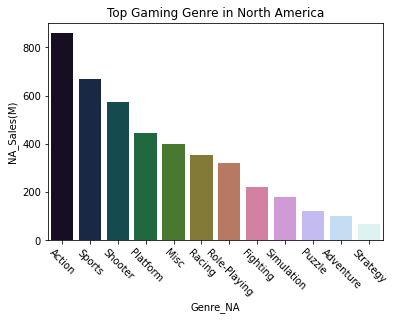

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 6))

# NA_G = sales_data['Genre_NA']
# NA_Sales = sales_data['NA_Sales(M)']

# ax.bar(NA_G, NA_Sales, color=['#E6E6FA','#9F2B68','#CBC3E3','#CF9FFF','#AA98A9','#915F6D','#C3B1E1','#E0B0FF','#A95C68','#D8BFD8','#7F00FF','#BDB5D5'])

# ax.set_ylabel('Sales(M)', size=13)
# ax.set_xlabel('Genre', size=13)
# ax.set_title('North America Top Genre', size=20, weight = 'bold')
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(90)

# plt.show()

import numpy as np, scipy.stats as st
import seaborn as sns

sns.barplot(data=sales_data, x = 'Genre_NA', y = 'NA_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in North America')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

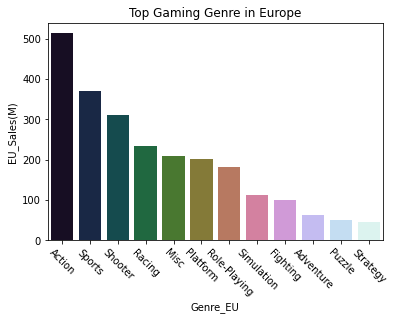

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 6))

# EU_G = sales_data['Genre_EU']
# EU_Sales = sales_data['EU_Sales(M)']

# ax.bar(EU_G, EU_Sales, color=['#E6E6FA','#9F2B68','#CBC3E3','#CF9FFF','#AA98A9','#915F6D','#C3B1E1','#E0B0FF','#A95C68','#D8BFD8','#7F00FF','#BDB5D5'])

# ax.set_ylabel('Sales(M)', size=13)
# ax.set_xlabel('Genre', size=13)
# ax.set_title('Europe Top Genre', size=20, weight = 'bold')
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(90)

# plt.show()

sns.barplot(data=sales_data, x = 'Genre_EU', y = 'EU_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Europe')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

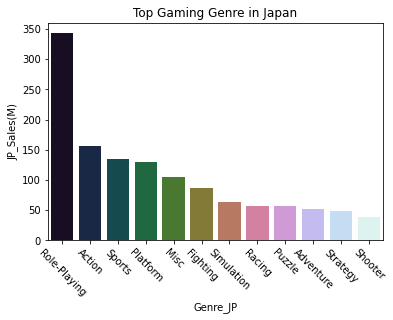

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 6))

# JP_G = sales_data['Genre_JP']
# JP_Sales = sales_data['JP_Sales(M)']

# ax.bar(JP_G, JP_Sales, color=['#E6E6FA','#9F2B68','#CBC3E3','#CF9FFF','#AA98A9','#915F6D','#C3B1E1','#E0B0FF','#A95C68','#D8BFD8','#7F00FF','#BDB5D5'])

# ax.set_ylabel('Sales(M)', size=13)
# ax.set_xlabel('Genre', size=13)
# ax.set_title('Japan Top Genre', size=20, weight = 'bold')
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(90)

# plt.show()

sns.barplot(data=sales_data, x = 'Genre_JP', y = 'JP_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Japan')
plt.xticks(rotation = -45)

In [ ]:
JP_rp = df[df['Genre']=='Role-Playing']
JP_rp = JP_rp.sort_values('JP_Sales(M)',ascending=False).reset_index()
JP_rp.head()

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,7685,Pokemon Red/Pokemon Blue,GB,False,Handheld,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1,9251,Pokemon Gold/Pokemon Silver,GB,False,Handheld,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
2,10364,Pokemon Diamond/Pokemon Pearl,DS,False,Handheld,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
3,10429,Pokemon Black/Pokemon White,DS,False,Handheld,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,10717,Pokemon Ruby/Pokemon Sapphire,GBA,False,Handheld,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84


In [ ]:
df[df['Name'].str.contains('Pokemon')]

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
252,Pokemon Trozei!,DS,False,Handheld,2005,Puzzle,Nintendo,0.26,0.00,0.31,0.02,0.59
1231,Pokemon Conquest,DS,False,Handheld,2012,Role-Playing,Nintendo,0.58,0.06,0.37,0.04,1.05
1409,Pokemon Art Academy,3DS,False,Handheld,2014,Misc,Nintendo,0.18,0.12,0.16,0.03,0.49
1784,Pokemon FireRed/Pokemon LeafGreen,GBA,False,Handheld,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
1785,Pokemon Rumble Blast,3DS,False,Handheld,2011,Action,Nintendo,0.47,0.26,0.35,0.07,1.15
1896,Pokemon Mystery Dungeon: Explorers of Sky,DS,False,Handheld,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58
2666,Pokemon Pinball,GB,False,Handheld,1999,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
4013,Pokemon Ranger: Guardian Signs,DS,False,Handheld,2010,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.32
4170,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,False,Handheld,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
4712,Pokemon HeartGold/Pokemon SoulSilver,DS,False,Handheld,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

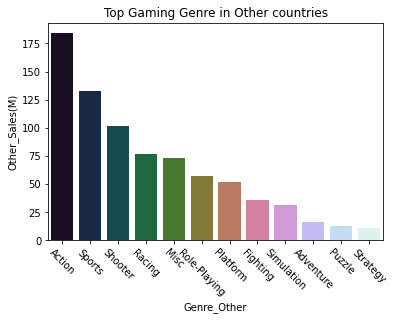

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 6))

# Other_G = sales_data['Genre_Other']
# Other_Sales = sales_data['Other_Sales(M)']

# ax.bar(Other_G, Other_Sales, color=['#E6E6FA','#9F2B68','#CBC3E3','#CF9FFF','#AA98A9','#915F6D','#C3B1E1','#E0B0FF','#A95C68','#D8BFD8','#7F00FF','#BDB5D5'])

# ax.set_ylabel('Sales(M)', size=13)
# ax.set_xlabel('Genre', size=13)
# ax.set_title('Top Genre in Other Countries', size=20, weight = 'bold')
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(90)

# plt.show()

sns.barplot(data=sales_data, x = 'Genre_Other', y = 'Other_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Other countries')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

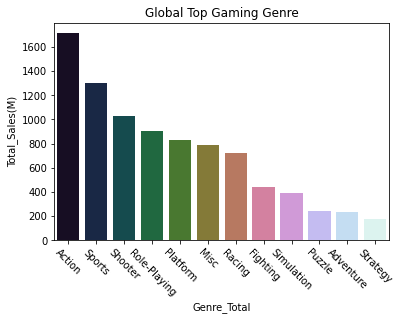

In [ ]:
# fig, ax = plt.subplots(figsize = (8, 6))

# Total_G = sales_data['Genre_Total']
# Total_Sales = sales_data['Total_Sales(M)']

# ax.bar(Total_G, Total_Sales, color=['#E6E6FA','#9F2B68','#CBC3E3','#CF9FFF','#AA98A9','#915F6D','#C3B1E1','#E0B0FF','#A95C68','#D8BFD8','#7F00FF','#BDB5D5'])

# ax.set_ylabel('Sales(M)', size=13)
# ax.set_xlabel('Genre', size=13)
# ax.set_title('Global Top Genre', size=20, weight = 'bold')
# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(90)

# plt.show()

import numpy as np, scipy.stats as st
import seaborn as sns

sns.barplot(data=sales_data, x = 'Genre_Total', y = 'Total_Sales(M)',
            palette = 'cubehelix', saturation = 8).set(title='Global Top Gaming Genre')
plt.xticks(rotation = -45)

지역구분: NA, EU, JP, Others, Global <br>
지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

<note>
지역별 선호하는 장르가 다름을 볼수 있다.
일본을 제외한 지역에서 선호하는 장르: Action, Sports, Shooter
일본에서 선호하는 장르: Role-Playing, Action, Sports-> 다른 지역들과 다르게 shooter이 최하위권에 있으며, role-playing 장르가 우세하다. Also, result from "JP_rp" shows that the top 5 role-playing games in Japan are Pokemon-titled. We can also see that Japanese prefer their own games in that Nintendo and Pokemon are Japanese companies.

# Q2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?->현재트렌드에 맞는 장르 선택

트렌드는 어떤 것을 기준으로 파악했는지 설명함<br>
연도별로 트렌드가 존재하는지 여부를 언급함<br>
왜 존재한다/존재하지 않는다고 생각했는지 설명함<br>

1. 연도별 장르 count<br>
2. 연도별 platform_group

In [ ]:
df.head()

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


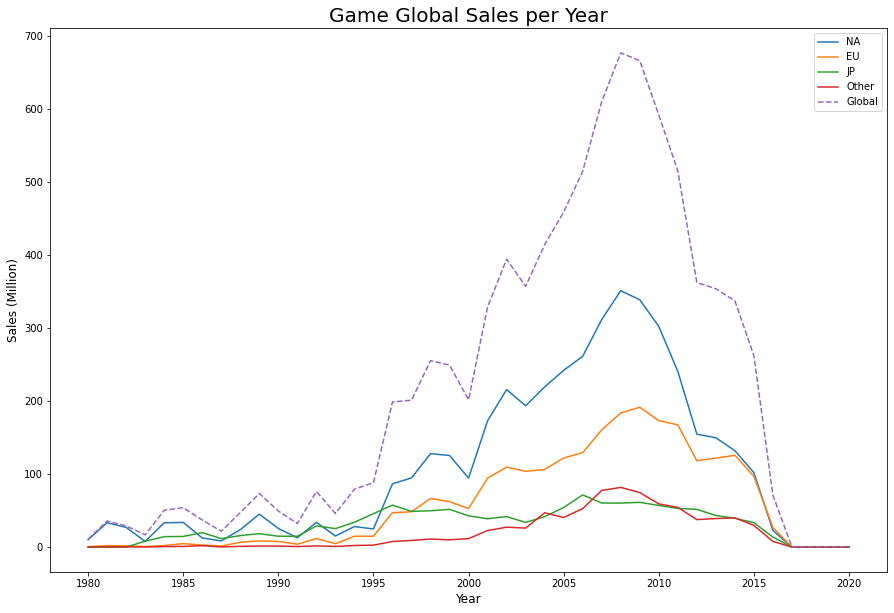

In [ ]:
subset_year = df.groupby(by="Year").sum()
subset_year.drop("Multiplatform", axis=1 ,inplace=True)
subset_year = subset_year

plt.figure(figsize = (15,10))
ax = plt.gca()
plt.plot(subset_year.index, subset_year[subset_year.columns[0]], label = "NA")
plt.plot(subset_year.index, subset_year[subset_year.columns[1]], label = "EU")
plt.plot(subset_year.index, subset_year[subset_year.columns[2]], label = "JP")
plt.plot(subset_year.index, subset_year [subset_year.columns[3]], label = "Other")
plt.plot(subset_year.index, subset_year[subset_year.columns[4]], linestyle='--', label = "Global")

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (Million)', fontsize = 12)
plt.title('Game Global Sales per Year', fontsize = 20)
plt.show()

In [ ]:
year_list = []
genre_list = []
sale_list = []

D_year_genre = df.groupby(['Year','Genre']).sum()['Total_Sales(M)'].reset_index()

for i in range(1980,2018): # 2020년도에 출시된 게임은 왜 range에 안들어가지..
    year_genre = D_year_genre[D_year_genre['Year'] == i].sort_values(by='Total_Sales(M)',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Total_Sales(M)']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
D_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Total_Sales(M)'])
D_year_genre

,Year,Genre,Total_Sales(M)
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


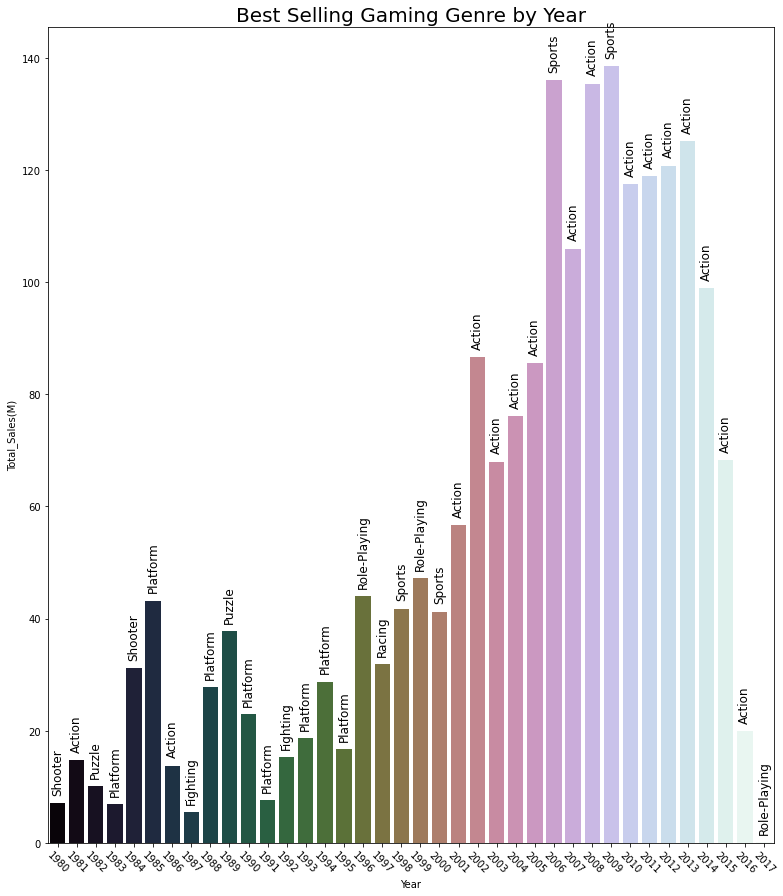

In [ ]:
fig, ax = plt.subplots(figsize=(13, 15))
bar = sns.barplot(x='Year', y='Total_Sales(M)', data=D_year_genre, palette = 'cubehelix',)
plt.title('Best Selling Gaming Genre by Year', fontsize = 20)
# plt.legend(handles=bar,labels=list(df_year_genre['Total_Sales(M)'])) ## 범례
for index, row in D_year_genre.iterrows():
    plt.text(index , row['Total_Sales(M)'] + 2, str(row.Genre), color='black', ha="center", rotation = 90, size=12)

plt.xticks(rotation = -45)
plt.show()

<note>
전체적인 흐름을 파악하기 위해 데이터 전체에 대해 barplot 을 그려봤다.<br>
2000년대부터 sales가 눈에 띄게 늘어난것을 볼수 있다.

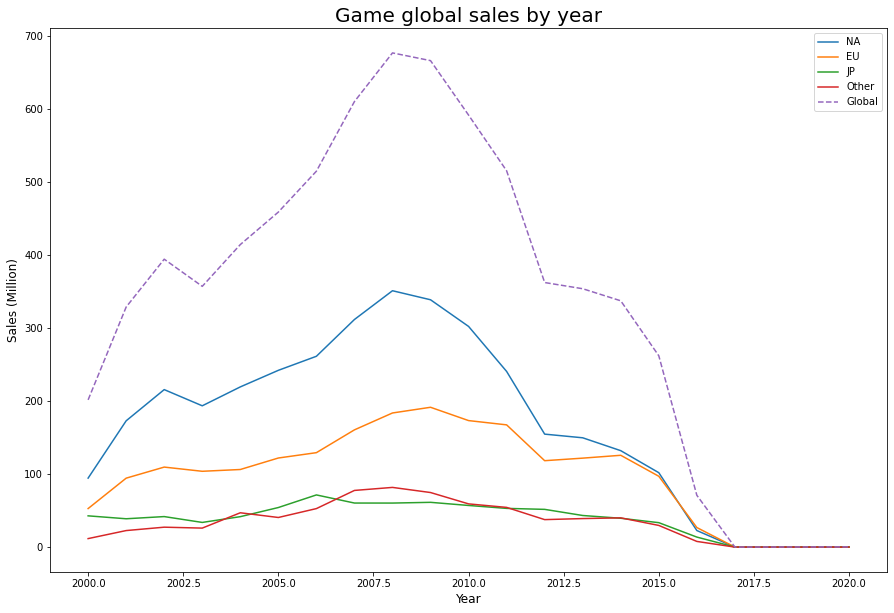

In [ ]:
# 더불어 최근 동향 파악을 위해 2000대에 출시된 게임으로 그래프 확대
subset_year = df.groupby(by="Year").sum()
subset_year.drop("Multiplatform", axis=1 ,inplace=True)
subset_year = subset_year[subset_year.index >= 2000]

plt.figure(figsize = (15,10))

plt.plot(subset_year.index, subset_year[subset_year.columns[0]], label = "NA")
plt.plot(subset_year.index, subset_year[subset_year.columns[1]], label = "EU")
plt.plot(subset_year.index, subset_year[subset_year.columns[2]], label = "JP")
plt.plot(subset_year.index, subset_year [subset_year.columns[3]], label = "Other")
plt.plot(subset_year.index, subset_year[subset_year.columns[4]], linestyle='--', label = "Global")

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (Million)', fontsize = 12)
plt.title('Game global sales by year', fontsize = 20)
plt.show()

<note>
대체적으로 북미에서 매출이 가장 많고, 그다음이 EU

In [ ]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre = df[df['Year']>=2000].groupby(['Year','Genre']).sum()['Total_Sales(M)'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre[subset_year_genre['Year'] == i].sort_values(by='Total_Sales(M)',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Total_Sales(M)']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Total_Sales(M)'])
df_year_genre

,Year,Genre,Total_Sales(M)
0,2000,Sports,41.24
1,2001,Action,56.68
2,2002,Action,86.65
3,2003,Action,67.98
4,2004,Action,76.15
5,2005,Action,85.52
6,2006,Sports,136.12
7,2007,Action,105.99
8,2008,Action,135.46
9,2009,Sports,138.59


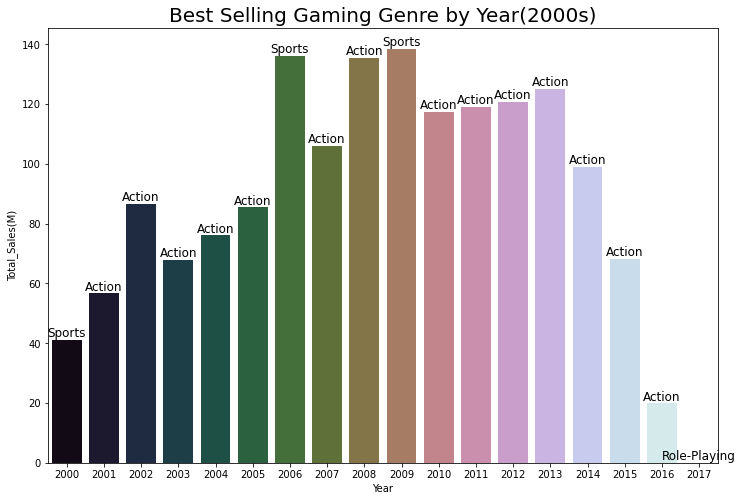

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Total_Sales(M)', data=df_year_genre, palette = 'cubehelix')
plt.title('Best Selling Gaming Genre by Year(2000s)', fontsize = 20)
# plt.legend(handles=bar,labels=list(df_year_genre['Total_Sales(M)'])) ## 범례
for index, row in df_year_genre.iterrows():
    plt.text(index , row['Total_Sales(M)'] + 1, str(row.Genre), color='black', ha="center", size=12)
plt.show()

# colors = sns.color_palette('hls',len(df)) ## 막대기 개수만큼 색상 지정

<note>
매년 Action 장르의 

# Q3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
<note>
인기가 많다는 것을 어떻게 정의했는지 설명함<br>
해당 게임이 왜 인기가 많다고 생각했는지 설명함<br>
시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)<br>
해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함 -> 위 조건들에 부합하는 회사와 게임 검색<br>

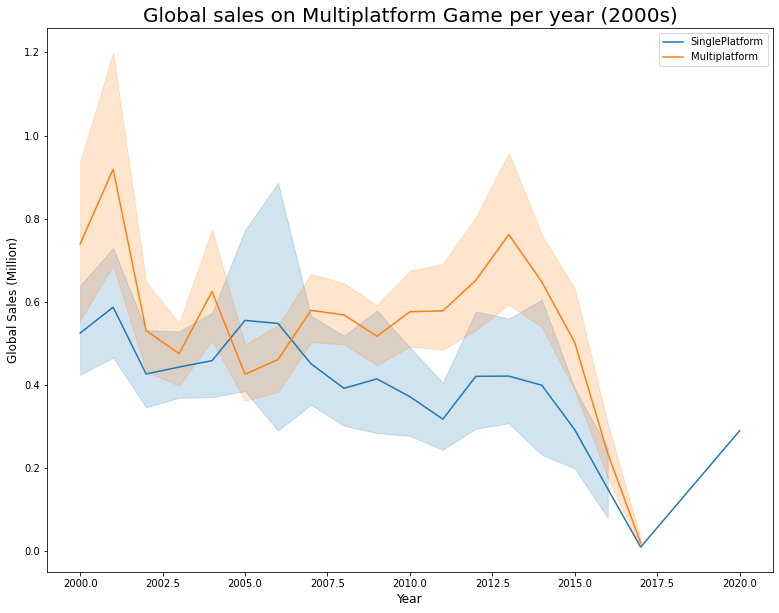

In [ ]:
plt.figure(figsize = (13,10))

sns.lineplot(x='Year', y='Total_Sales(M)', data=df[df['Year']>=2000], hue='Multiplatform')
ax.set_xlim(2000, 2020)

plt.legend(loc='best',labels = ['SinglePlatform', 'Multiplatform'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Global Sales (Million)', fontsize = 12)
plt.title('Global sales on Multiplatform Game per year (2000s)', fontsize = 20)

plt.show()

<note>
대체로 글로벌 시장에서 singleplatform보다 Multiplatform 게임 판매량이 높다.

In [ ]:
# 2000s sales in global gaming market by platform
subset_ym = df[df['Year']>=2000].groupby(by=['Year','Platform_Group','Multiplatform']).sum() #2000년대 이후 출시
subset_ym = subset_ym.reset_index()
subset_ym

,Year,Platform_Group,Multiplatform,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,2000,Handheld,False,4.00,2.26,6.90,1.25,14.41
1,2000,Handheld,True,2.44,1.28,2.14,0.24,6.10
2,2000,Home,False,52.93,31.23,26.70,6.60,117.46
3,2000,Home,True,32.02,16.52,7.03,3.35,58.92
4,2000,PC,False,3.02,1.41,0.00,0.17,4.60
...,...,...,...,...,...,...,...,...
101,2016,PC,True,0.70,1.21,0.00,0.14,2.05
102,2017,Handheld,False,0.00,0.00,0.01,0.00,0.01
103,2017,Handheld,True,0.00,0.00,0.01,0.00,0.01
104,2017,Home,True,0.00,0.00,0.03,0.00,0.03


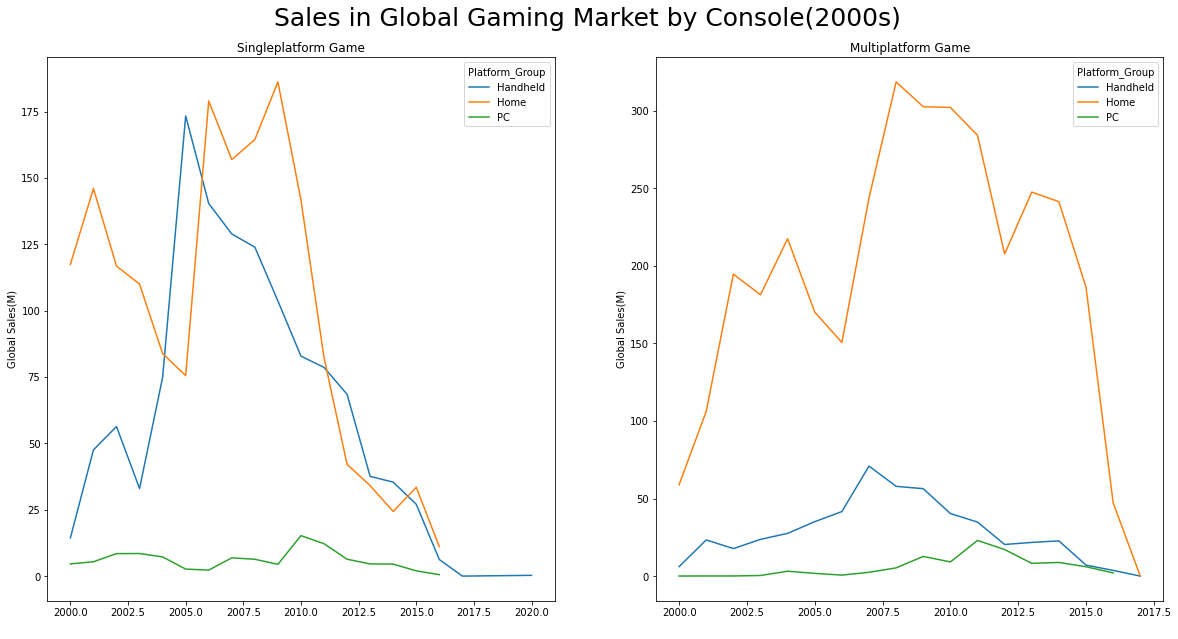

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x = 'Year', y='Total_Sales(M)', hue = 'Platform_Group', data=subset_ym[subset_ym['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Global Sales(M)', fontsize = 10)
ax[0].set_title('Singleplatform Game')

sns.lineplot(x = 'Year', y='Total_Sales(M)', hue = 'Platform_Group', data=subset_ym[subset_ym['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Global Sales(M)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('Sales in Global Gaming Market by Console(2000s)', fontsize=25, y=0.95)
plt.show()

Multiplatform plot 에서는 home video game console의 판매량이 압도적으로 많다는 것을 볼수 있다.<br>

> Handheld video Game을 계획중이라면 singleplatform이 매출에 도움이 될 것이다.<br>
> home video game 을 설계한다면 multiplatform으로 하는 것이 매출에 도움이 될 것이다.






Text(0.5, 1.0, 'Global Sales by Platform Console(2000s)')

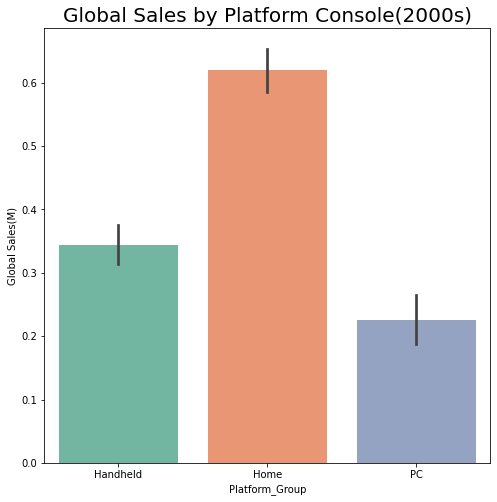

In [ ]:
# Platform_Group-
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Platform_Group', y='Total_Sales(M)', data= df[df['Year']>=2000], palette = 'Set2')
ax.set_ylabel('Global Sales(M)')
ax.set_title('Global Sales by Platform Console(2000s)', fontsize = 20)

action genre의 platform console 비교

In [107]:
# Genre_filter = (df.Genre == 'Action') & (df.Year > 2010) # 조건식 작성
# df_action = df.loc[Genre_filter].reset_index(drop = True)

# Platform_filter = (df_action.Platform == 'PS4') # 조건식 작성
# df_action_ps4 = df_action.loc[Platform_filter].reset_index(drop = True)

# plt.figure(figsize=(10,10))
# locate_NA = df_action_ps4['NA_Sales(M)'].sum()
# locate_EU = df_action_ps4['EU_Sales(M)'].sum()
# locate_JP = df_action_ps4['JP_Sales(M)'].sum()
# locate_Other = df_action_ps4['Other_Sales(M)'].sum()
# locate_group = pd.DataFrame({'locate':['NA','EU','JP','Other'],'Sales(M)':[locate_NA, locate_EU,locate_JP,locate_Other]})
# locate_barplot = sns.barplot(x='locate', y='Sales(M)',data=locate_group)
# Sales(M) = locate_group['Sales'].values
# cnt = 0
# for value in locate_group['Sales(M)']:
#     locate_barplot.text(x=cnt, y=value+0.5, s=str(str(round(value,2))),
#             color='black', size=10, ha='center')

SyntaxError: ignored

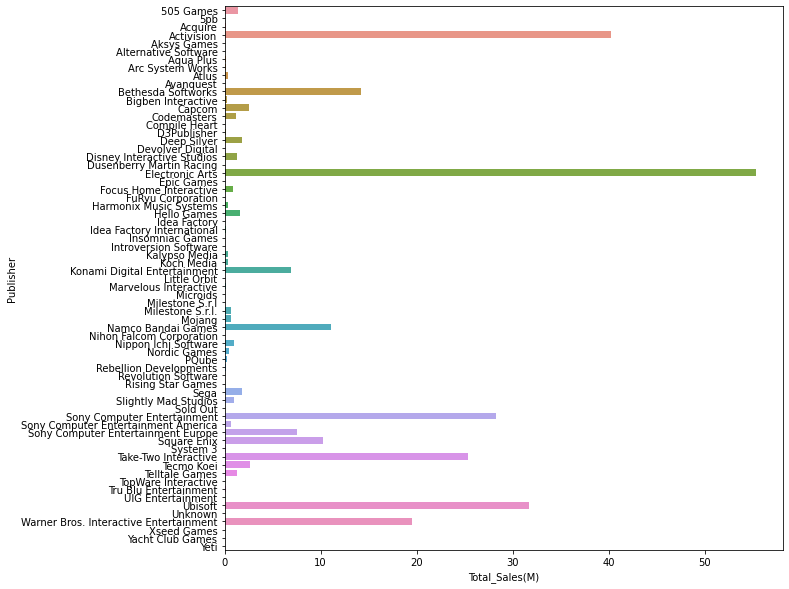

In [103]:
# Platform_filter = (df[df['Year']>=2000].Platform == 'PS4') # 조건식 작성
# df_action_ps4 = df[df['Year']>=2000].loc[Platform_filter].reset_index(drop = True)
# df_action_ps4
# # 연도별 장르 갯수 추출
# df_action_ps4_pub = df_action_ps4.groupby(['Publisher'])['Total_Sales(M)'].sum().reset_index()
# plt.figure(figsize=(10, 10))
# res_barplot = sns.barplot(x='Total_Sales(M)', y='Publisher',data=df_action_ps4_pub)
# plt.show()
# # f, ax = plt.subplots(1,1, figsize=(8, 8))
# # sns.barplot(x = 'Platform_Group', y='Total_Sales(M)', data= df[{df['Year']>=2000} & {df['Genre']=='Action'}], palette = 'Set2')
# # ax.set_ylabel('Global Sales(M)')
# # ax.set_title('Global Sales by Platform Console(2000s)', fontsize = 20)

In [ ]:
{# df.P_global=df[df['Year']>=2000].sort_values(by='Total_Sales(M)', ascending=False)
# df.P_global=df.P_global.drop_duplicates(["Name"], keep = 'first').reset_index(drop=True,inplace=True)
# # -> Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
# df.P_global.head()

In [ ]:
# # Does the publisher have any impact on the regional sales?
sales_top = df[df.Year > 2000].sort_values(by='Total_Sales(M)', ascending=False)
sales_top = sales_top.head(50).reset_index(drop=True)
sales_top

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Wii Sports,Wii,False,Home,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,Wii,False,Home,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
2,Wii Sports Resort,Wii,False,Home,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,DS,False,Handheld,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,Wii,False,Home,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
5,New Super Mario Bros. Wii,Wii,False,Home,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
6,Nintendogs,DS,False,Handheld,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
7,Mario Kart DS,DS,False,Handheld,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
8,Wii Fit,Wii,False,Home,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,Wii Fit Plus,Wii,False,Home,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [ ]:
subset = sales_top.groupby('Publisher').sum().sort_values(by='Total_Sales(M)', ascending=False).reset_index()
subset

,Publisher,Multiplatform,Year,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Nintendo,1,50183,223.04,171.31,91.61,44.98,530.94
1,Activision,10,20112,69.46,44.21,2.78,15.59,132.04
2,Take-Two Interactive,8,16063,56.79,37.65,3.15,23.84,121.43
3,Microsoft Game Studios,0,6027,29.97,9.75,0.45,3.66,43.83
4,Sony Computer Entertainment,0,6015,12.82,9.98,3.78,10.81,37.39
5,Ubisoft,1,2011,6.05,3.15,0.00,1.07,10.27


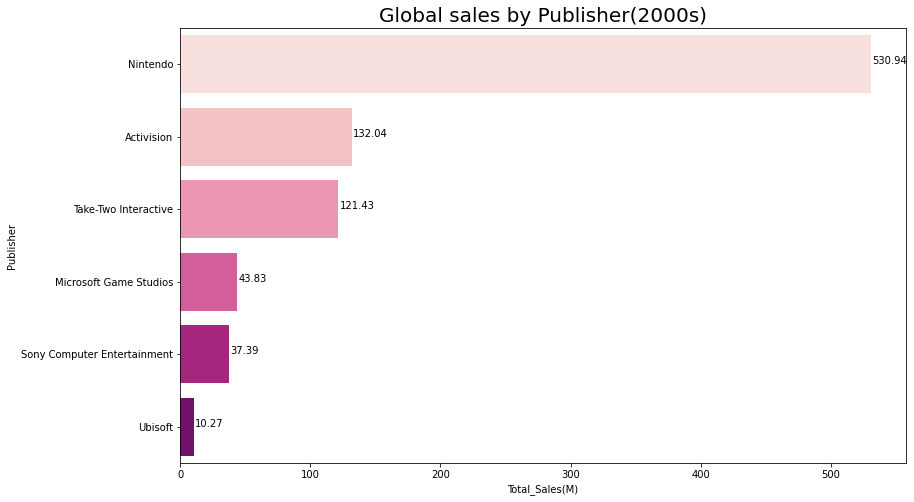

In [ ]:
publisher = sales_top['Publisher'].values
plt.figure(figsize=(13, 8))
sales_top_bar = sns.barplot(x ='Total_Sales(M)', y='Publisher', data=subset, palette = 'RdPu')
cnt = 0
for value in subset['Total_Sales(M)']:
    sales_top_bar.text(x=value +1, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1

plt.title('Global sales by Publisher(2000s)', fontsize = 20)
plt.show()

<note>
Nintendo: globally 가장 많은 sales share을 보유하고 있다.

### Platform 기준

In [80]:
genre_f = (df.Genre == 'Action') & (df.Year > 2000) # Action이 가장 많음
df_act = df.loc[genre_f].reset_index(drop = True)
df_act=df_act.sort_values(by='Total_Sales(M)', ascending=False).reset_index()
df_act

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,635,Grand Theft Auto V,PS3,True,Home,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,2619,Grand Theft Auto: San Andreas,PS2,True,Home,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,1950,Grand Theft Auto V,X360,True,Home,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,986,Grand Theft Auto: Vice City,PS2,True,Home,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4,1760,Grand Theft Auto III,PS2,True,Home,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,816,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,False,Handheld,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
2968,810,"Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki",PSV,False,Handheld,2015,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
2969,804,Young Justice: Legacy,X360,True,Home,2013,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
2970,2175,Chokkan! Asonde Relaxuma,DS,False,Handheld,2008,Action,Rocket Company,0.00,0.00,0.01,0.00,0.01


In [85]:
df_act_platform = df_act.groupby(['Platform'])['Total_Sales(M)'].sum().reset_index()
df_act_platform

,Platform,Total_Sales(M)
0,3DS,56.49
1,DC,0.04
2,DS,114.00
3,GB,3.65
4,GBA,54.13
5,GC,37.11
6,N64,0.16
7,PC,25.24
8,PS,12.46
9,PS2,266.29


In [86]:
df_act_platform = df_act_platform.sort_values(by='Total_Sales(M)', ascending=False).reset_index()
df_act_platform

,index,Platform,Total_Sales(M)
0,10,PS3,301.49
1,9,PS2,266.29
2,16,X360,239.60
3,2,DS,114.00
4,14,Wii,110.32
5,11,PS4,84.70
6,12,PSP,62.68
7,0,3DS,56.49
8,4,GBA,54.13
9,17,XB,47.44


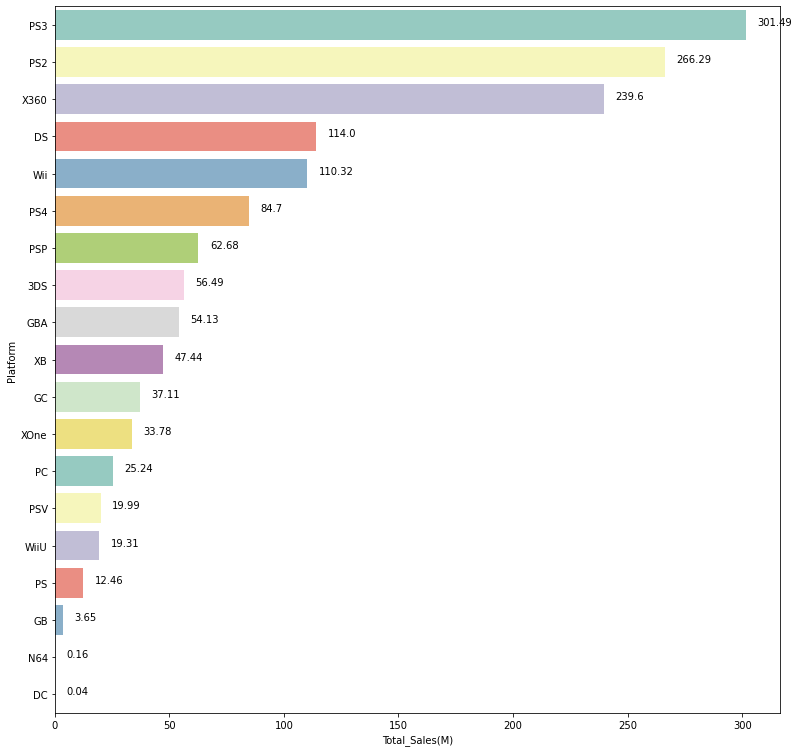

In [87]:
platform = df_act_platform['Platform'].values
plt.figure(figsize=(13, 13))
df_act_platform_sales = sns.barplot(x ='Total_Sales(M)', y='Platform', data=df_act_platform, palette='Set3')
cnt = 0
for value in df_act_platform['Total_Sales(M)']:
    df_act_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.show()

# Q4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?

분석에 대한 결론이 영상에서 제시됨

In [ ]:
# classification by company's nationality

In [ ]:
# let's check if the top selling games are multyplayer game